In [14]:
import matplotlib.pyplot as plt

In [15]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
import numpy as np

In [16]:
import sxs

In [17]:
catalog = sxs.load("catalog")

In [18]:
# this is a pd.DataFrame
catalog.table

object_types  initial_separation  initial_orbital_frequency  \
SXS:BBH:0001          BHBH               18.00                   0.012203   
SXS:BBH:0002          BHBH               19.00                   0.011292   
SXS:BBH:0003          BHBH               19.00                   0.011284   
SXS:BBH:0004          BHBH               19.00                   0.011313   
SXS:BBH:0005          BHBH               18.00                   0.012168   
...                    ...                 ...                        ...   
SXS:BHNS:0003         BHNS               51.43                   0.005595   
SXS:BHNS:0004         BHNS               39.20                   0.006233   
SXS:BHNS:0005         BHNS               39.20                   0.006235   
SXS:BHNS:0006         BHNS               52.50                   0.004524   
SXS:BHNS:0007         BHNS               56.00                   0.004454   

               initial_adot  initial_ADM_energy  \
SXS:BBH:0001      -0.000025            0.993736   
SXS:BBH:0002      -0.000021            0.994031   
SXS:BBH:0003      -0.000019            0.994277   
SXS:BBH:0004      -0.000028            0.994314   
SXS:BBH:0005      -0.000016            0.993947   
...                     ...                 ...   
SXS:BHNS:0003      0.000000            5.400000   
SXS:BHNS:0004     -0.000022            2.778112   
SXS:BHNS:0005     -0.000025            2.780039   
SXS:BHNS:0006     -0.000012            3.475229   
SXS:BHNS:0007     -0.000015            4.171456   

                                     initial_ADM_linear_momentum  \
SXS:BBH:0001       [7.5160071e-09, 2.4389069e-09, -5.798632e-10]   
SXS:BBH:0002     [1.6810827e-09, 1.4244131e-09, -1.14839759e-08]   
SXS:BBH:0003   [2.599703e-09, -4.1239227e-09, 6.03918869017e-05]   
SXS:BBH:0004       [-2.7524803e-09, 5.883293e-09, 5.3376578e-09]   
SXS:BBH:0005      [-3.7413651e-09, -2.4006761e-09, 7.874335e-10]   
...                                                          ...   
SXS:BHNS:0003                                    [0.0, 0.0, 0.0]   
SXS:BHNS:0004  [-1.2457454507e-06, 5.44427247228e-06, -6.2716...   
SXS:BHNS:0005  [2.981054730059816e-06, -1.22406716840395e-06,...   
SXS:BHNS:0006  [-3.413420373258928e-06, -2.0768413414982537e-...   
SXS:BHNS:0007  [4.867002495810236e-07, -1.5158476150901928e-0...   

               initial_ADM_linear_momentum_mag  \
SXS:BBH:0001                      7.923059e-09   
SXS:BBH:0002                      1.169345e-08   
SXS:BBH:0003                      6.039189e-05   
SXS:BBH:0004                      8.407132e-09   
SXS:BBH:0005                      4.514544e-09   
...                                        ...   
SXS:BHNS:0003                     0.000000e+00   
SXS:BHNS:0004                     5.620082e-06   
SXS:BHNS:0005                     3.222581e-06   
SXS:BHNS:0006                     3.995587e-06   
SXS:BHNS:0007                     1.516629e-05   

                                    initial_ADM_angular_momentum  \
SXS:BBH:0001   [4.27581822e-08, -2.342625073e-07, 1.184715566...   
SXS:BBH:0002   [2.7620419806e-06, -2.4287931932e-06, 1.210130...   
SXS:BBH:0003   [0.1251774015530911, -0.0006755685628109, 1.21...   
SXS:BBH:0004   [8.163645183e-07, 7.736321355e-07, 1.094457487...   
SXS:BBH:0005   [9.790607752e-07, 1.026494432e-07, 1.300909689...   
...                                                          ...   
SXS:BHNS:0003                      [0.0, 0.0, 16.60638426824671]   
SXS:BHNS:0004                      [0.0, 0.0, 8.447059816549256]   
SXS:BHNS:0005                      [0.0, 0.0, 8.111755992167552]   
SXS:BHNS:0006                     [0.0, 0.0, 12.993342233650518]   
SXS:BHNS:0007                      [0.0, 0.0, 16.29283505660932]   

               initial_ADM_angular_momentum_mag  initial_mass1  ...  \
SXS:BBH:0001                           1.184716        0.50000  ...   
SXS:BBH:0002                           1.210131        0.50000  ...   
SXS:BBH:0003                

In [19]:
catalog.table.columns

Index(['object_types', 'initial_separation', 'initial_orbital_frequency',
       'initial_adot', 'initial_ADM_energy', 'initial_ADM_linear_momentum',
       'initial_ADM_linear_momentum_mag', 'initial_ADM_angular_momentum',
       'initial_ADM_angular_momentum_mag', 'initial_mass1', 'initial_mass2',
       'initial_mass_ratio', 'initial_dimensionless_spin1',
       'initial_dimensionless_spin1_mag', 'initial_dimensionless_spin2',
       'initial_dimensionless_spin2_mag', 'initial_position1',
       'initial_position2', 'com_correction_space_translation',
       'com_correction_space_translation_mag', 'com_correction_boost_velocity',
       'com_correction_boost_velocity_mag', 'reference_time',
       'reference_separation', 'reference_orbital_frequency_mag',
       'reference_mass_ratio', 'reference_chi1_mag', 'reference_chi2_mag',
       'reference_chi_eff', 'reference_chi1_perp', 'reference_chi2_perp',
       'reference_eccentricity', 'reference_eccentricity_bound',
       'reference

In [20]:
catalog.table.fillna(0, axis=1)

object_types initial_separation initial_orbital_frequency  \
SXS:BBH:0001          BHBH               18.0                  0.012203   
SXS:BBH:0002          BHBH               19.0                  0.011292   
SXS:BBH:0003          BHBH               19.0                  0.011284   
SXS:BBH:0004          BHBH               19.0                  0.011313   
SXS:BBH:0005          BHBH               18.0                  0.012168   
...                    ...                ...                       ...   
SXS:BHNS:0003         BHNS              51.43                  0.005595   
SXS:BHNS:0004         BHNS               39.2                  0.006233   
SXS:BHNS:0005         BHNS               39.2                  0.006235   
SXS:BHNS:0006         BHNS               52.5                  0.004524   
SXS:BHNS:0007         BHNS               56.0                  0.004454   

              initial_adot initial_ADM_energy  \
SXS:BBH:0001     -0.000025           0.993736   
SXS:BBH:0002     -0.000021           0.994031   
SXS:BBH:0003     -0.000019           0.994277   
SXS:BBH:0004     -0.000028           0.994314   
SXS:BBH:0005     -0.000016           0.993947   
...                    ...                ...   
SXS:BHNS:0003          0.0                5.4   
SXS:BHNS:0004    -0.000022           2.778112   
SXS:BHNS:0005    -0.000025           2.780039   
SXS:BHNS:0006    -0.000012           3.475229   
SXS:BHNS:0007    -0.000015           4.171456   

                                     initial_ADM_linear_momentum  \
SXS:BBH:0001       [7.5160071e-09, 2.4389069e-09, -5.798632e-10]   
SXS:BBH:0002     [1.6810827e-09, 1.4244131e-09, -1.14839759e-08]   
SXS:BBH:0003   [2.599703e-09, -4.1239227e-09, 6.03918869017e-05]   
SXS:BBH:0004       [-2.7524803e-09, 5.883293e-09, 5.3376578e-09]   
SXS:BBH:0005      [-3.7413651e-09, -2.4006761e-09, 7.874335e-10]   
...                                                          ...   
SXS:BHNS:0003                                    [0.0, 0.0, 0.0]   
SXS:BHNS:0004  [-1.2457454507e-06, 5.44427247228e-06, -6.2716...   
SXS:BHNS:0005  [2.981054730059816e-06, -1.22406716840395e-06,...   
SXS:BHNS:0006  [-3.413420373258928e-06, -2.0768413414982537e-...   
SXS:BHNS:0007  [4.867002495810236e-07, -1.5158476150901928e-0...   

              initial_ADM_linear_momentum_mag  \
SXS:BBH:0001                              0.0   
SXS:BBH:0002                              0.0   
SXS:BBH:0003                          0.00006   
SXS:BBH:0004                              0.0   
SXS:BBH:0005                              0.0   
...                                       ...   
SXS:BHNS:0003                             0.0   
SXS:BHNS:0004                        0.000006   
SXS:BHNS:0005                        0.000003   
SXS:BHNS:0006                        0.000004   
SXS:BHNS:0007                        0.000015   

                                    initial_ADM_angular_momentum  \
SXS:BBH:0001   [4.27581822e-08, -2.342625073e-07, 1.184715566...   
SXS:BBH:0002   [2.7620419806e-06, -2.4287931932e-06, 1.210130...   
SXS:BBH:0003   [0.1251774015530911, -0.0006755685628109, 1.21...   
SXS:BBH:0004   [8.163645183e-07, 7.736321355e-07, 1.094457487...   
SXS:BBH:0005   [9.790607752e-07, 1.026494432e-07, 1.300909689...   
...                                                          ...   
SXS:BHNS:0003                      [0.0, 0.0, 16.60638426824671]   
SXS:BHNS:0004                      [0.0, 0.0, 8.447059816549256]   
SXS:BHNS:0005                      [0.0, 0.0, 8.111755992167552]   
SXS:BHNS:0006                     [0.0, 0.0, 12.993342233650518]   
SXS:BHNS:0007                      [0.0, 0.0, 16.29283505660932]   

              initial_ADM_angular_momentum_mag initial_mass1  ...  \
SXS:BBH:0001                          1.184716           0.5  ...   
SXS:BBH:0002                          1.210131           0.5  ...   
SXS:BBH:0003                          1.216661           0.5  ...   
SXS:BBH:0004             

In [21]:
(catalog.table.fillna(0, axis=1)['reference_eccentricity_bound']).astype(float)

SXS:BBH:0001     0.000257
SXS:BBH:0002     0.000175
SXS:BBH:0003     0.000287
SXS:BBH:0004     0.000380
SXS:BBH:0005     0.000236
                   ...   
SXS:BHNS:0003    0.000500
SXS:BHNS:0004    0.000060
SXS:BHNS:0005    0.000500
SXS:BHNS:0006    0.000270
SXS:BHNS:0007    0.000470
Name: reference_eccentricity_bound, Length: 2028, dtype: float64

In [22]:
catalog_ns = catalog.table[
    (catalog.table['object_types'] == 'BHBH')
    & (catalog.table['reference_mass_ratio'].round(3) == 1)
    & (catalog.table['reference_chi1_mag'].round(3) == 0)
    & (catalog.table['reference_chi2_mag'].round(3) == 0)
    & (catalog.table['reference_chi1_perp'].round(3) == 0)
    & (catalog.table['reference_chi2_perp'].round(3) == 0)
    & (catalog.table.fillna(0, axis=1)['reference_eccentricity_bound'].astype(float).round(3) <= 1e-3)
]

In [23]:
catalog_ns

object_types  initial_separation  initial_orbital_frequency  \
SXS:BBH:0001         BHBH           18.000000                   0.012203   
SXS:BBH:0002         BHBH           19.000000                   0.011292   
SXS:BBH:0066         BHBH           18.000100                   0.012202   
SXS:BBH:0067         BHBH           18.001000                   0.012202   
SXS:BBH:0070         BHBH           18.000000                   0.012202   
SXS:BBH:0071         BHBH           17.999900                   0.012202   
SXS:BBH:0072         BHBH           17.999000                   0.012202   
SXS:BBH:0086         BHBH           18.000000                   0.012207   
SXS:BBH:0090         BHBH           19.000000                   0.011296   
SXS:BBH:0180         BHBH           18.000000                   0.012202   
SXS:BBH:0389         BHBH           15.428589                   0.015246   
SXS:BBH:1132         BHBH           23.127165                   0.008518   
SXS:BBH:1153         BHBH           20.790283                   0.009930   
SXS:BBH:1154         BHBH           20.790283                   0.009934   
SXS:BBH:1155         BHBH           20.790283                   0.009934   

              initial_adot  initial_ADM_energy  \
SXS:BBH:0001     -0.000025            0.993736   
SXS:BBH:0002     -0.000021            0.994031   
SXS:BBH:0066     -0.000025            0.993735   
SXS:BBH:0067     -0.000025            0.993737   
SXS:BBH:0070     -0.000025            0.993735   
SXS:BBH:0071     -0.000025            0.993735   
SXS:BBH:0072     -0.000025            0.993734   
SXS:BBH:0086     -0.000022            0.993742   
SXS:BBH:0090     -0.000025            0.994035   
SXS:BBH:0180     -0.000025            0.993735   
SXS:BBH:0389     -0.000037            0.992786   
SXS:BBH:1132     -0.000005            0.994988   
SXS:BBH:1153     -0.000010            0.994471   
SXS:BBH:1154     -0.000008            0.994475   
SXS:BBH:1155     -0.000008            0.994475   

                                   initial_ADM_linear_momentum  \
SXS:BBH:0001     [7.5160071e-09, 2.4389069e-09, -5.798632e-10]   
SXS:BBH:0002   [1.6810827e-09, 1.4244131e-09, -1.14839759e-08]   
SXS:BBH:0066   [-3.1483019e-09, -3.7937639e-09, 1.4360428e-09]   
SXS:BBH:0067    [2.1710304e-09, 4.5983196e-09, -3.2701829e-09]   
SXS:BBH:0070    [1.2353239e-09, -4.8770037e-09, 2.5460439e-09]   
SXS:BBH:0071      [3.911247e-10, 6.306938e-10, -1.2207419e-08]   
SXS:BBH:0072        [-1.571719e-10, 1.33716e-11, 8.710264e-10]   
SXS:BBH:0086     [7.2481579e-09, 2.7691121e-09, 1.0813396e-09]   
SXS:BBH:0090      [2.455327e-10, -5.965038e-10, 8.2258836e-09]   
SXS:BBH:0180                    [5e-15, 3.539e-13, -3.778e-13]   
SXS:BBH:0389      [-2.940568e-10, 1.2680514e-09, -1.73795e-11]   
SXS:BBH:1132         [-2.156564e-10, 3.97011e-10, 4.51632e-11]   
SXS:BBH:1153   [-8.52379115e-08, -6.50011757e-08, -3.6786e-12]   
SXS:BBH:1154  [-8.67044966e-08, -1.227347207e-07, 1.66055e-11]   
SXS:BBH:1155  [-7.71528799e-08, -1.183423093e-07, 3.16491e-11]   

              initial_ADM_linear_momentum_mag  \
SXS:BBH:0001                     7.923059e-09   
SXS:BBH:0002                     1.169345e-08   
SXS:BBH:0066                     5.134848e-09   
SXS:BBH:0067                     6.045826e-09   
SXS:BBH:0070                     5.638575e-09   
SXS:BBH:0071                     1.222996e-08   
SXS:BBH:0072                     8.851942e-10   
SXS:BBH:0086                     7.834097e-09   
SXS:BBH:0090                     8.251137e-09   
SXS:BBH:0180                     5.176901e-13   
SXS:BBH:0389                     1.301816e-09   
SXS:BBH:1132                     4.540541e-10   
SXS:BBH:1153                     1.071945e-07   
SXS:BBH:1154                     1.502714e-07   
SXS:BBH:1155                     1.412709e-07   

                                   initial_ADM_angular_momentum  \
SXS:BBH:0001  [4.27581822e-08, -2.342625073e-07, 1.184715566...   
SXS:BBH:0002  [2.76

<Axes: xlabel='reference_eccentricity', ylabel='initial_separation'>

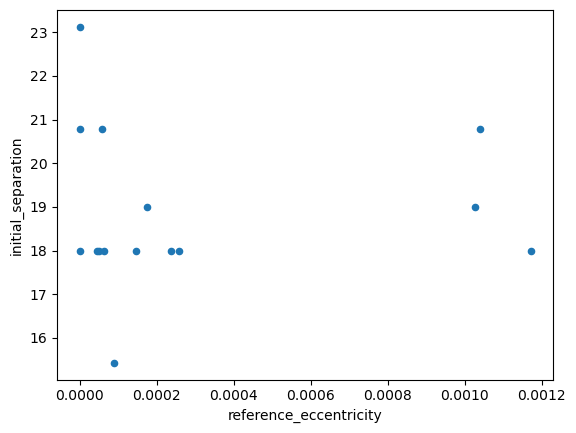

In [24]:
catalog_ns[['reference_eccentricity','initial_separation']].fillna(0).plot.scatter(x='reference_eccentricity', y='initial_separation')

In [25]:
catalog_ns.sort_index()[['reference_eccentricity_bound','initial_separation','initial_orbital_frequency']]

reference_eccentricity_bound  initial_separation  \
SXS:BBH:0001                      0.000257           18.000000   
SXS:BBH:0002                      0.000175           19.000000   
SXS:BBH:0066                      0.000064           18.000100   
SXS:BBH:0067                      0.000237           18.001000   
SXS:BBH:0070                      0.000046           18.000000   
SXS:BBH:0071                      0.000061           17.999900   
SXS:BBH:0072                      0.000146           17.999000   
SXS:BBH:0086                      0.001171           18.000000   
SXS:BBH:0090                      0.001025           19.000000   
SXS:BBH:0180                      0.000051           18.000000   
SXS:BBH:0389                      0.000089           15.428589   
SXS:BBH:1132                      0.000770           23.127165   
SXS:BBH:1153                      0.001040           20.790283   
SXS:BBH:1154                      0.000057           20.790283   
SXS:BBH:1155                      0.000049           20.790283   

              initial_orbital_frequency  
SXS:BBH:0001                   0.012203  
SXS:BBH:0002                   0.011292  
SXS:BBH:0066                   0.012202  
SXS:BBH:0067                   0.012202  
SXS:BBH:0070                   0.012202  
SXS:BBH:0071                   0.012202  
SXS:BBH:0072                   0.012202  
SXS:BBH:0086                   0.012207  
SXS:BBH:0090                   0.011296  
SXS:BBH:0180                   0.012202  
SXS:BBH:0389                   0.015246  
SXS:BBH:1132                   0.008518  
SXS:BBH:1153                   0.009930  
SXS:BBH:1154                   0.009934  
SXS:BBH:1155                   0.009934

In [26]:
np.pi/0.012203

257.4442885839378

In [27]:
np.pi/0.009934

316.2464922075491

In [28]:
catalog_ns.sort_values(by='reference_eccentricity_bound', ascending=False)[['reference_eccentricity_bound','initial_separation']]

reference_eccentricity_bound  initial_separation
SXS:BBH:0086                      0.001171           18.000000
SXS:BBH:1153                      0.001040           20.790283
SXS:BBH:0090                      0.001025           19.000000
SXS:BBH:1132                      0.000770           23.127165
SXS:BBH:0001                      0.000257           18.000000
SXS:BBH:0067                      0.000237           18.001000
SXS:BBH:0002                      0.000175           19.000000
SXS:BBH:0072                      0.000146           17.999000
SXS:BBH:0389                      0.000089           15.428589
SXS:BBH:0066                      0.000064           18.000100
SXS:BBH:0071                      0.000061           17.999900
SXS:BBH:1154                      0.000057           20.790283
SXS:BBH:0180                      0.000051           18.000000
SXS:BBH:1155                      0.000049           20.790283
SXS:BBH:0070                      0.000046           18.000000

In [29]:
waveform = sxs.load("SXS:BBH:1154/Lev/rhOverM")

Found the following files to load from the SXS catalog:
    SXS:BBH:1154v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


/opt/homebrew/Caskroom/miniforge/base/envs/lmfit/lib/python3.10/site-packages/sxs/waveforms/nrar.py:176: UserWarning: 
Could not find root group as `h5_group` or as `extrapolation_order`; returning all groups
  warnings.warn(warning)


In [30]:
list(waveform)

['Extrapolated_N2.dir',
 'Extrapolated_N3.dir',
 'Extrapolated_N4.dir',
 'OutermostExtraction.dir',
 'VersionHist.ver']

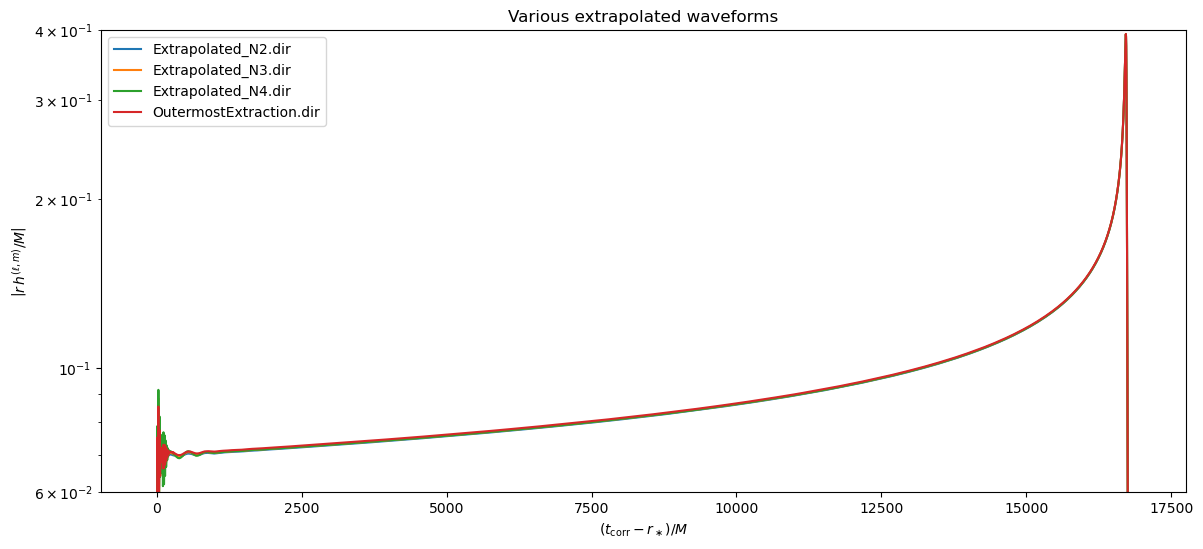

In [31]:
plt.figure(figsize=(14,6))
for key, w_i in waveform.items():
    if key != 'VersionHist.ver':
        plt.semilogy(w_i.t, w_i.abs[:, w_i.index(2, 2)])
plt.ylim(0.06, 0.4);

plt.title(f"Various extrapolated waveforms")
plt.xlabel(r"$(t_{\mathrm{corr}} - r_\ast)/M$")
plt.ylabel(r"$\left| r\, h^{(\ell,m)}/M \right|$");
plt.legend(waveform);

In [32]:
extrapolation_orders = [2,3,4]
waveforms = {}
# long q1
location = "SXS:BBH:1154/Lev/rhOverM"
# location = "SXS:BBH:1155/Lev/rhOverM"
# location = "SXS:BBH:1153/Lev/rhOverM"
# seems bad
# location = "SXS:BBH:1132/Lev/rhOverM"
# location = "SXS:BBH:0389/Lev/rhOverM"
# location = "SXS:BBH:0071/Lev/rhOverM"
# location = "SXS:BBH:0090/Lev/rhOverM"
# location = "SXS:BBH:0001/Lev/rhOverM"

for extrapolation_order in extrapolation_orders:
    waveforms[extrapolation_order] = sxs.load(location, extrapolation_order=extrapolation_order)
    waveforms[extrapolation_order].time = waveforms[extrapolation_order].time - waveforms[extrapolation_order].max_norm_time()

Found the following files to load from the SXS catalog:
    SXS:BBH:1154v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1154v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:1154v5/Lev3/rhOverM_Asymptotic_GeometricUnits_CoM.h5


In [33]:
!du -sch ~/.sxs

2.2G	/Users/sebastian.khan/.sxs
2.2G	total


In [34]:
waveforms[2].t.shape

(29351,)

In [35]:
waveforms[3].t.shape

(29351,)

In [36]:
waveforms[4].t.shape

(29351,)

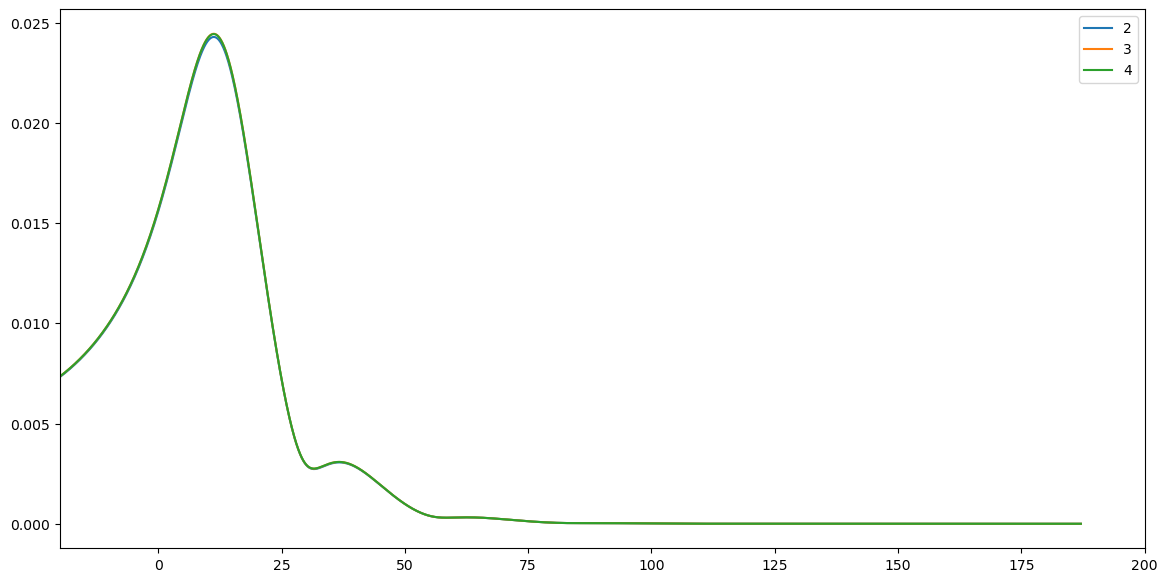

In [37]:
plt.figure(figsize=(14,7))
for k, v in waveforms.items():
    plt.plot(v.time, v[:, v.index(3, 2)].abs, label=k)
# plt.yscale('log')
# plt.ylim(-0.0001, 0.0001)
plt.xlim(-20, 200)
plt.legend()

In [38]:
phases22 = {}
freqs22 = {}
for i in waveforms.keys():
    phases22[i] = np.unwrap(np.angle(waveforms[i][:, waveforms[i].index(2, 2)]))
    freqs22[i] = IUS(waveforms[i].t, phases22[i]).derivative()(waveforms[i].t)

In [39]:
phases = {}
freqs = {}
for i in waveforms.keys():
    phases[i] = np.unwrap(np.angle(waveforms[i][:, waveforms[i].index(3, 2)]))
    freqs[i] = IUS(waveforms[i].t, phases[i]).derivative()(waveforms[i].t)

(-1.0, 1.0)

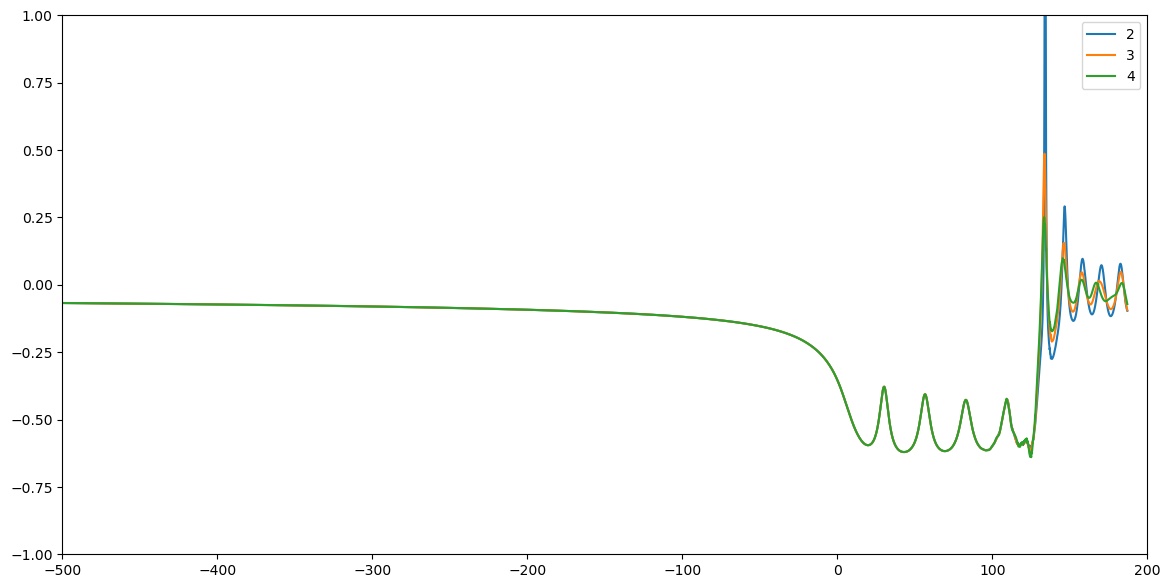

In [40]:
plt.figure(figsize=(14,7))
plt.plot(waveforms[2].t, freqs[2], label=2)
plt.plot(waveforms[3].t, freqs[3], label=3)
plt.plot(waveforms[4].t, freqs[4], label=4)
plt.legend()
plt.xlim(-500, 200)
plt.ylim(-1,1)

(-1.0, 1.0)

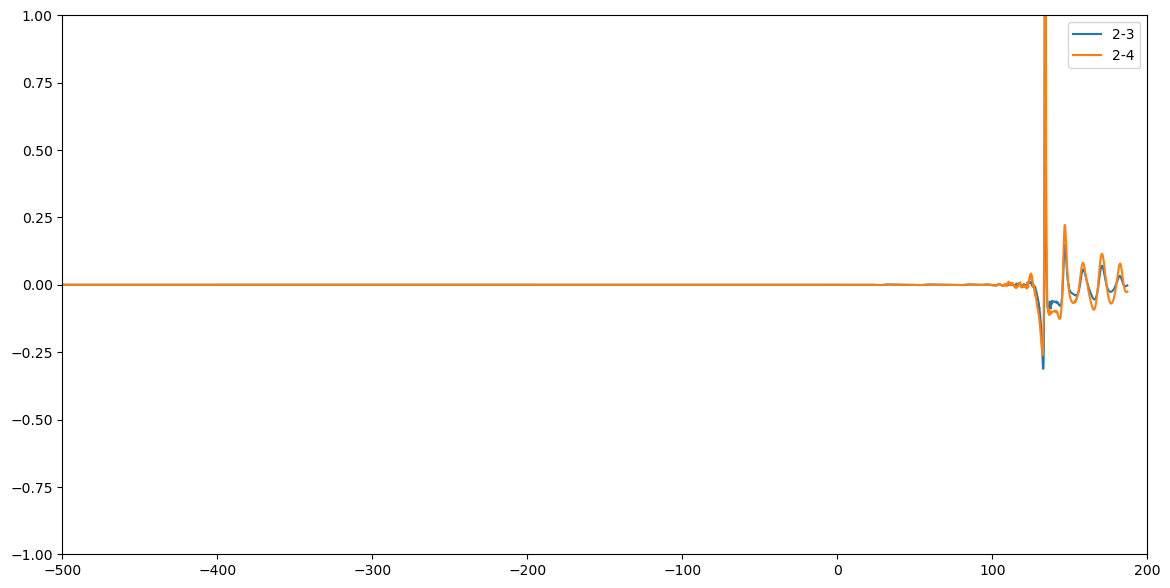

In [41]:
plt.figure(figsize=(14,7))
plt.plot(waveforms[2].t, freqs[2]-freqs[3], label="2-3")
plt.plot(waveforms[2].t, freqs[2]-freqs[4], label="2-4")
plt.legend()
plt.xlim(-500, 200)
plt.ylim(-1,1)

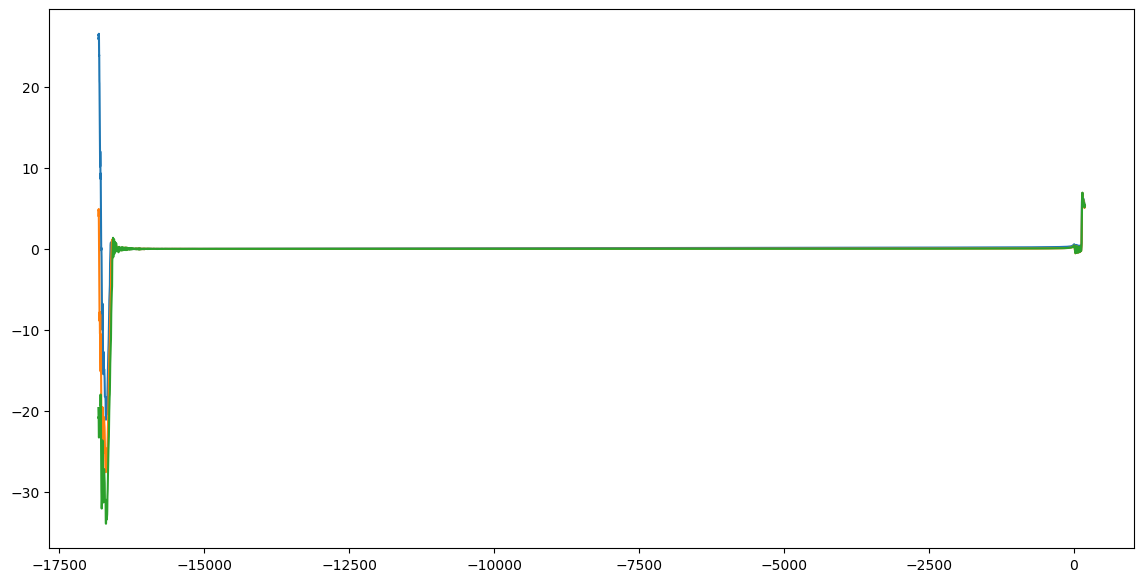

In [42]:
plt.figure(figsize=(14,7))
v = phases[2] - 2*phases22[2]/2
plt.plot(waveforms[2].t, v-v[300])
v = phases[3] - 2*phases22[3]/2
plt.plot(waveforms[2].t, v-v[300])
v = phases[4] - 2*phases22[4]/2
plt.plot(waveforms[2].t, v-v[300])
# plt.xlim(-100,300)
# plt.axvline(waveforms[2].t[300])

(-1.0, 1.0)

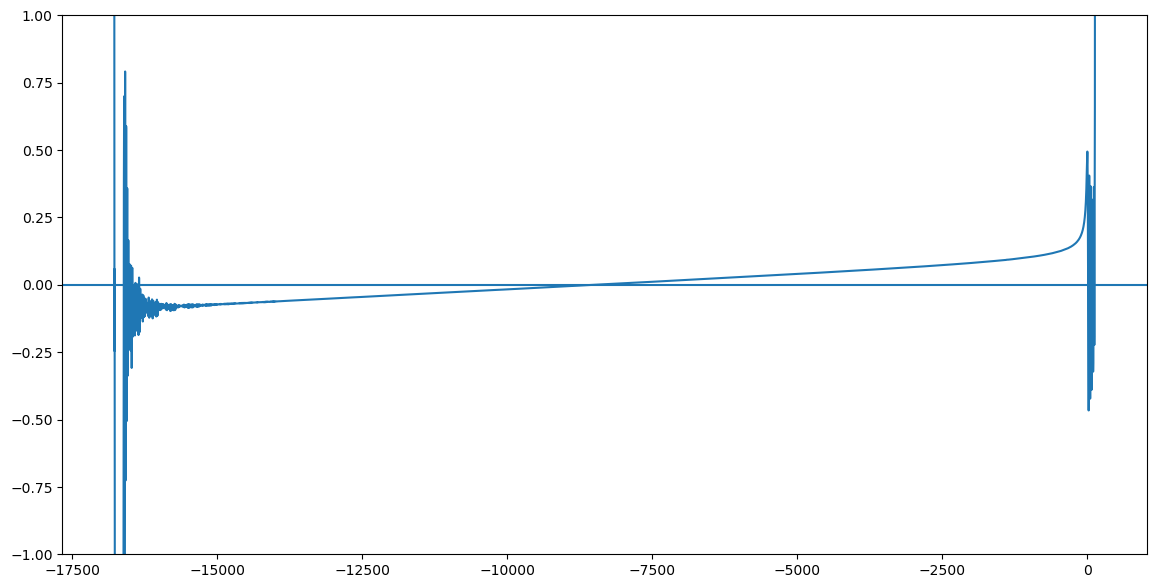

In [43]:
plt.figure(figsize=(14,7))
v = phases[2] - 2*phases22[2]/2
plt.plot(waveforms[2].t, v-v[6000])
# plt.xlim(-10000, 100)
plt.axhline(0)
plt.ylim(-1, 1)

In [44]:
# phase as a function of frequency

In [45]:
phases22

{2: array([   1.02021684,    0.93438967,    0.88290293, ..., -586.16158613,
        -586.16754313, -586.17327483]),
 3: array([  -1.32438806,   -1.23453464,   -1.24971822, ..., -598.74434072,
        -598.75204426, -598.75951774]),
 4: array([  -1.22283677,   -1.20954193,   -1.35501816, ..., -592.44798845,
        -592.45617512, -592.46415572])}

In [46]:
t_start = waveforms[2].t[0] * 0.9

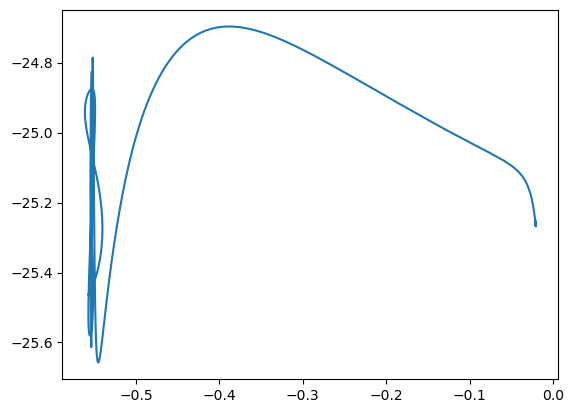

In [47]:
mask = (waveforms[2].t > t_start) & (waveforms[2].t < 100)
plt.plot(freqs22[2][mask], phases[2][mask]-phases22[2][mask])

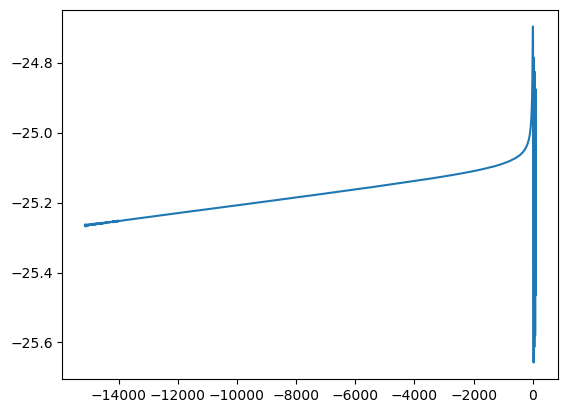

In [48]:
mask = (waveforms[2].t > t_start) & (waveforms[2].t < 100)
plt.plot(waveforms[2].t[mask], phases[2][mask]-phases22[2][mask])

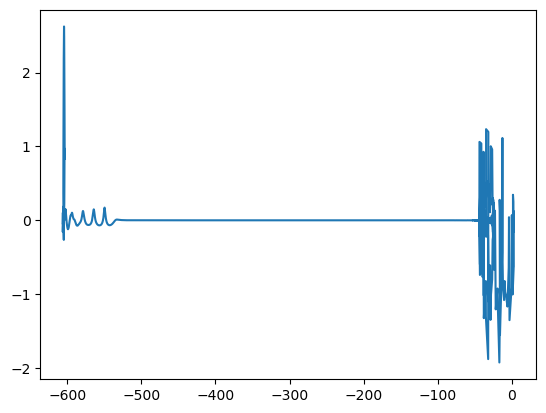

In [49]:
plt.plot(phases[2], freqs[2]-freqs22[2])

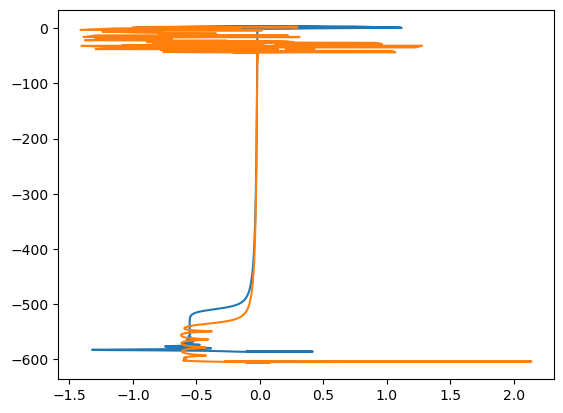

In [50]:
plt.plot(freqs22[2], phases22[2])
plt.plot(freqs[2], phases[2])
# plt.axvline(-0.1)

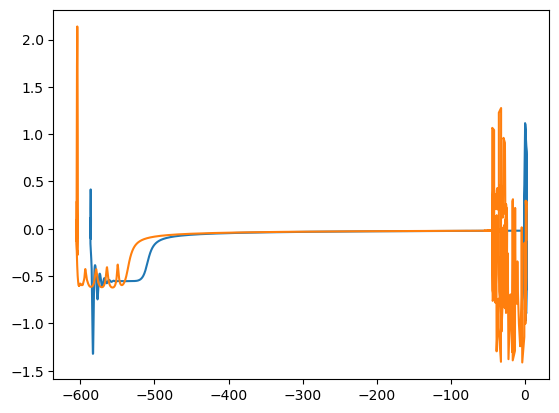

In [51]:
plt.plot(phases22[2], freqs22[2])
plt.plot(phases[2], freqs[2])

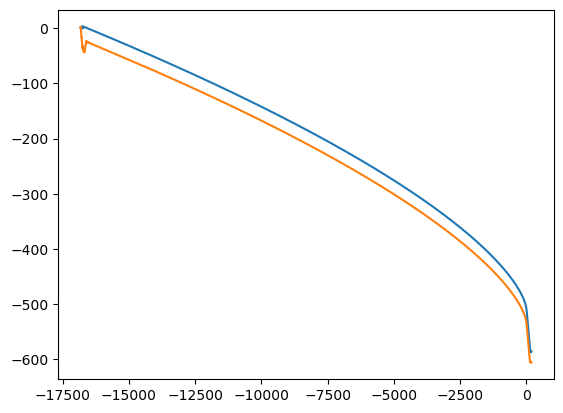

In [52]:
plt.plot(waveforms[2].t, phases22[2])
plt.plot(waveforms[2].t, phases[2])
# plt.xlim(-100, 100)

(-100.0, 100.0)

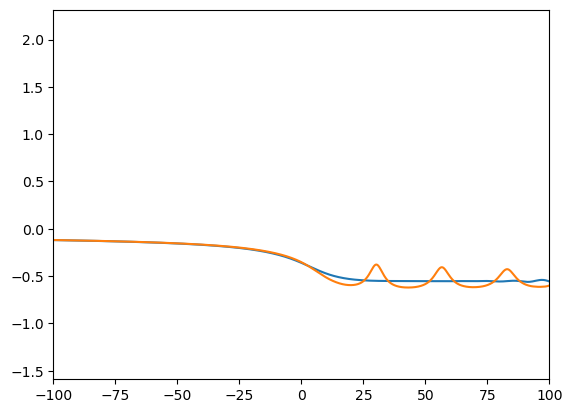

In [53]:
plt.plot(waveforms[2].t, freqs22[2])
plt.plot(waveforms[2].t, freqs[2])
plt.xlim(-100, 100)